# Atelier 1 : Agrégation, formatage, définition du besoin
Dans ce TP, nous allons explorer plusieurs étapes cruciales pour la préparation de données avant leur utilisation dans un modèle de machine learning. Nous utiliserons des données hospitalières pour illustrer les concepts abordés.

N'oubliez pas d'explorer la documentation pour chaque fonction que vous utilisez et d'approfondir vos connaissances sur chaque méthode !
> **Ressources utiles** :
> - [Documentation de Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
> - [Documentation de Scikit-learn](https://scikit-learn.org/stable/documentation.html)
> - [Documentation de Imbalanced-learn](https://imbalanced-learn.org/stable/index.html)

#### 📊 Récupération des données

Créez deux DataFrames pandas à partir des fichiers JSON (hospital1.json) et CSV (hospital2.json) mis à disposition. Pour cela, utilisez les fonctions `read_csv` et `read_json` de la bibliothèque pandas.

> **Astuce** : Consultez la [documentation de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) si vous avez des doutes sur les options de `read_csv` et `read_json`.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# A compléter
df_h1 = pd.read_json('./hopital1.json')
df_h2 = pd.read_csv('./hopital2.csv')
df_h1.head()
df_h2.head()


,Grossesses,Glucose,PressionSanguine,EpaisseurPeau,Insuline,IMC,FonctionPedigreeDiabete,DateNaissance,Diagnostic,Poids,Taille,Pays
0,9,134.0,74.0,3.3,60.0 mu U/ml,25.9,0.460,1943,0,74.01,169.04,India
1,9,120.0,72.0,2.2,56.0 mu U/ml,20.8,0.733,1976,0,51.96,158.05,India
2,8,74.0,70.0,4.0,49.0 mu U/ml,35.3,0.705,1985,0,107.17,174.24,USA
3,0,124.0,56.0,1.3,105.0 mu U/ml,21.8,0.452,2003,0,76.13,186.87,India
4,0,74.0,52.0,1.0,36.0 mu U/ml,27.8,0.269,2002,0,66.17,154.29,USA


#### 🔗 Concaténation des jeux de données 

Essayez de **concaténer** les deux DataFrames pour former un seul ensemble de données. Vous pouvez utiliser la fonction `concat` de Pandas.

❓ **Question** : Que se passe-t-il ? Quels problèmes pouvez-vous observer ?


In [7]:
# A compléter
df_combined = pd.concat([df_h1, df_h2], ignore_index=True)
df_combined

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Weight,...,PressionSanguine,EpaisseurPeau,Insuline,IMC,FonctionPedigreeDiabete,DateNaissance,Diagnostic,Poids,Taille,Pays
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,94.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,116.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0,69.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0,77.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0,80.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,1.9,54.0 mu U/ml,26.9,0.497,1992.0,0.0,76.82,168.99,France
466,NaN,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.0,3.0,165.0 mu U/ml,34.3,0.203,1991.0,1.0,88.93,161.02,USA
467,NaN,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,2.9,127.0 mu U/ml,29.3,0.349,1982.0,1.0,76.52,161.60,USA
468,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,2.3,56.0 mu U/ml,39.5,0.159,1999.0,0.0,88.93,150.04,USA


#### 🔍 Observation rapide des données 

1. **Entête du DataFrame** 🧾  
Objectif : Affichez les 3 premières lignes du fichier avec `head()` pour une vue d'ensemble rapide.

2. **Métadonnées** 📊  
Visualisez les **types de données** de chaque colonne en utilisant `info()`. 

    ❓ **Question** : Que remarquez-vous concernant les types des colonnes ? Y a-t-il des ajustements à faire ?

   il faut changer le Dtype de insuline de Objet a Float

4. **Informations statistiques** 📈  
- Utilisez `value_counts()` sur les colonnes correspondant au nombre de grossesses pour afficher leur distribution.
- Obtenez un aperçu global des données avec `describe()`.

    ❓ **Question** : Quelles différences faites vous entre les deux jeux de données ?
  differences dans le moyenne et des donnes similaires p.ex: EpaisseurPeau et SkinThickness


In [8]:
# A compléter (1)
df_combined.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Weight,...,PressionSanguine,EpaisseurPeau,Insuline,IMC,FonctionPedigreeDiabete,DateNaissance,Diagnostic,Poids,Taille,Pays
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,94.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,116.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0,69.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# A compléter (2)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               235 non-null    float64
 1   Glucose                   470 non-null    float64
 2   BloodPressure             235 non-null    float64
 3   SkinThickness             235 non-null    float64
 4   Insulin                   235 non-null    float64
 5   BMI                       235 non-null    float64
 6   DiabetesPedigreeFunction  235 non-null    float64
 7   Age                       235 non-null    float64
 8   Outcome                   235 non-null    float64
 9   Weight                    235 non-null    float64
 10  Height                    235 non-null    float64
 11  Country                   235 non-null    object 
 12  Grossesses                235 non-null    float64
 13  PressionSanguine          235 non-null    float64
 14  EpaisseurP

In [13]:
# A compléter (3)
df_h1.describe()
df_h2.describe()

,Grossesses,Glucose,PressionSanguine,EpaisseurPeau,IMC,FonctionPedigreeDiabete,DateNaissance,Diagnostic,Poids,Taille
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,3.153191,121.480851,70.812766,2.871064,32.765532,0.502762,1992.693617,0.289362,90.389489,165.790213
std,3.072128,30.873789,13.077965,1.003888,6.547046,0.305068,10.742905,0.454434,20.662797,9.507634
min,0.000000,56.000000,24.000000,0.700000,18.200000,0.085000,1943.000000,0.000000,50.250000,134.930000
25%,1.000000,99.000000,62.000000,2.100000,28.500000,0.269000,1987.000000,0.000000,76.820000,159.965000
50%,2.000000,117.000000,72.000000,2.900000,33.200000,0.439000,1997.000000,0.000000,89.450000,165.000000
75%,5.000000,142.500000,79.000000,3.500000,36.800000,0.678000,2001.000000,1.000000,104.180000,173.205000
max,13.000000,198.000000,106.000000,6.000000,57.300000,1.699000,2003.000000,1.000000,148.800000,191.700000


#### 📊 Visualisation graphique 

Affichez la distribution de chaque variable avec un histogramme. Vous pouvez utiliser la méthode ``hist()`` de la classe ``Dataframe``



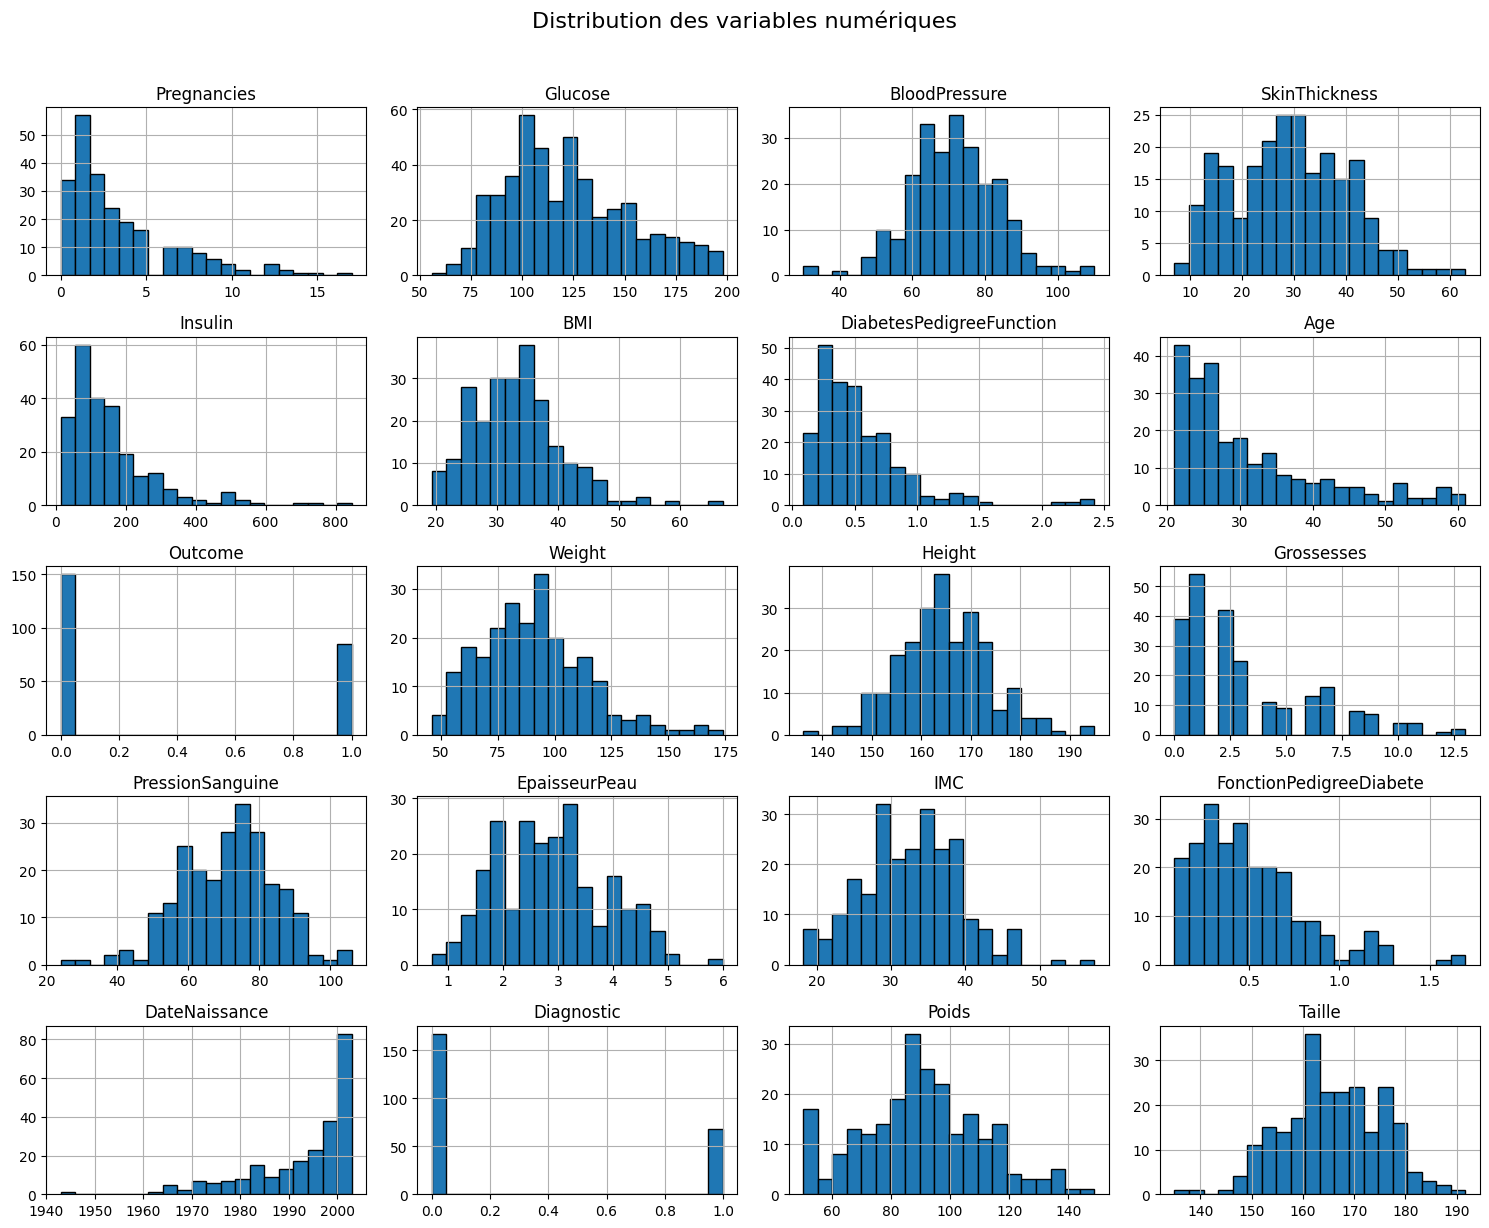

In [17]:
# A compléter
import matplotlib.pyplot as plt

numeric_cols = df_combined.select_dtypes(include=['int64', 'float64']).columns

df_combined[numeric_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')

plt.suptitle("Distribution des variables numériques", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#### 💉 Harmonisation de l'unité de la colonne `Insuline` 

**Problème** : Dans le jeu de données JSON, l'insuline est exprimée en texte, avec l'unité précisée (`mu U/ml`). On souhaite avoir une expression an accord avec la colonne Insulin du fichier CSV, c'est à dire sous la forme d'un entier.

**Étapes à suivre** :
1. Écrire une fonction pour vérifier que chaque entrée est exprimée en `mu U/ml` (réalisé).
2. Écrire une fonction pour **extraire la valeur numérique** de la mesure d'insuline.
3. Transformez la colonne pour exprimer la mesure en **valeurs numériques** avec `apply()`.


In [19]:
def check_insulin_format(insulin_str):
    return isinstance(insulin_str, str) and insulin_str.strip().endswith('mu U/ml')

def extract_insulin_value(insulin_str):
    if pd.isna(insulin_str):
        return pd.NA
    if check_insulin_format(insulin_str):
        try:
            return float(insulin_str.strip().replace('mu U/ml','').strip())
        except:
            return pd.NA
    try:
        return float(insulin_str)
    except:
        return pd.NA

# Aplicar la función al dataframe (df_h2 ya debería existir)
df_h2['Insuline'] = df_h2['Insuline'].apply(extract_insulin_value)
df_h2['Insuline'].head()


<class 'pandas.core.series.Series'>
RangeIndex: 235 entries, 0 to 234
Series name: Insuline
Non-Null Count  Dtype  
--------------  -----  
235 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


#### 📏 Harmonisation des unités de `EpaisseurPeau` 

Dans les jeux de données 1 et 2, l'épaisseur de la peau est exprimée avec des unités différentes (en **mm** et en **cm**).

📝 **Tâche** : Écrivez une fonction qui harmonise les unités pour que toutes les valeurs soient exprimées en **mm**.


In [20]:
def harmonize_skin_thickness(df):
    df = df.copy()
    if 'EpaisseurPeau' in df.columns and 'SkinThickness' not in df.columns:
        if df['EpaisseurPeau'].max() < 10:
            df['EpaisseurPeau'] = df['EpaisseurPeau'] * 10
        df['SkinThickness'] = df['EpaisseurPeau']
    elif 'SkinThickness' in df.columns:
        if df['SkinThickness'].max() < 10:
            df['SkinThickness'] = df['SkinThickness'] * 10
    return df

df_h2 = harmonize_skin_thickness(df_h2)
df_h2[['EpaisseurPeau','SkinThickness']].head()

,EpaisseurPeau,SkinThickness
0,33.0,33.0
1,22.0,22.0
2,40.0,40.0
3,13.0,13.0
4,10.0,10.0


#### ⏳ Transformation de la `DateNaissance` en âge 

Dans le jeu de données 1, c'est la **date de naissance** qui est exprimée, alors que dans le jeu 2, c'est l'**âge**.

📝 **Tâche** : Écrivez une fonction qui transforme la colonne `DateNaissance` en une colonne `Age`.


In [43]:
def date_naissance_to_age(df, current_year=2025):
    df = df.copy()
    if 'DateNaissance' in df.columns:
        df['Age'] = current_year - pd.to_numeric(df['DateNaissance'])
    return df

df_h2 = date_naissance_to_age(df_h2)
df_h2[['DateNaissance','Age']].head()

,DateNaissance,Age
0,1943,82
1,1976,49
2,1985,40
3,2003,22
4,2002,23


#### 🔄 Renommer les colonnes du jeu de données 2 

Utilisez la méthode `rename()` de pandas pour aligner les noms des colonnes avec ceux du jeu de données 1.

In [23]:
# A compléter
rename_map = {
    'Grossesses':'Pregnancies',
    'Glucose':'Glucose',
    'PressionSanguine':'BloodPressure',
    'EpaisseurPeau':'SkinThickness',
    'Insuline':'Insulin',
    'IMC':'BMI',
    'FonctionPedigreeDiabete':'DiabetesPedigreeFunction',
    'Age':'Age',
    'DateNaissance':'DateNaissance',
    'Diagnostic':'Outcome',
    'Poids':'Weight',
    'Taille':'Height',
    'Pays':'Country'
}
df_h2 = df_h2.rename(columns=rename_map)
df_h2.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,DateNaissance,Outcome,Weight,Height,Country,SkinThickness,Age
0,9,134.0,74.0,33.0,60.0,25.9,0.460,1943,0,74.01,169.04,India,33.0,82
1,9,120.0,72.0,22.0,56.0,20.8,0.733,1976,0,51.96,158.05,India,22.0,49
2,8,74.0,70.0,40.0,49.0,35.3,0.705,1985,0,107.17,174.24,USA,40.0,40
3,0,124.0,56.0,13.0,105.0,21.8,0.452,2003,0,76.13,186.87,India,13.0,22
4,0,74.0,52.0,10.0,36.0,27.8,0.269,2002,0,66.17,154.29,USA,10.0,23


#### 📊 Concaténation des jeux de données

Nous allons maintenant fusionner les deux DataFrames que nous avons préparés afin de créer un jeu de données complet. Utilisez la fonction `concat` de pandas pour combiner les DataFrames en un seul DataFrame.

In [40]:
df_combined = pd.concat([df_h1, df_h2])
df_combined

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Weight,Height,Country,DateNaissance
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,94.50,183.38,India,NaN
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,116.48,164.39,India,NaN
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,69.31,149.52,India,NaN
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,77.52,159.43,India,NaN
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,80.64,163.68,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,6,99.0,60.0,19.0,54.0,26.9,0.497,33,0,76.82,168.99,France,1992.0
231,0,121.0,66.0,30.0,165.0,34.3,0.203,34,1,88.93,161.02,USA,1991.0
232,1,149.0,68.0,29.0,127.0,29.3,0.349,43,1,76.52,161.60,USA,1982.0
233,4,84.0,90.0,23.0,56.0,39.5,0.159,26,0,88.93,150.04,USA,1999.0


#### 🔍 Retirer les doublons 

La fusion de plusieurs jeux de données peut générer des doublons, qui pourraient fausser l'analyse si on les laisse tels quels. Utilisez la méthode `drop_duplicates` pour supprimer les doublons dans `df_combined`.

> **📝 Astuce** : Utilisez la méthode `duplicated` pour identifier les doublons avant de les retirer.


In [30]:
# A compléter
df_h1 = df_h1.loc[:, ~df_h1.columns.duplicated()]
df_h2 = df_h2.loc[:, ~df_h2.columns.duplicated()]

df_combined = pd.concat([df_h1, df_h2], ignore_index=True, sort=False)
df_combined

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Weight,Height,Country,DateNaissance
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,94.50,183.38,India,NaN
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,116.48,164.39,India,NaN
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,69.31,149.52,India,NaN
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,77.52,159.43,India,NaN
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,80.64,163.68,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,6,99.0,60.0,19.0,54.0,26.9,0.497,33,0,76.82,168.99,France,1992.0
466,0,121.0,66.0,30.0,165.0,34.3,0.203,34,1,88.93,161.02,USA,1991.0
467,1,149.0,68.0,29.0,127.0,29.3,0.349,43,1,76.52,161.60,USA,1982.0
468,4,84.0,90.0,23.0,56.0,39.5,0.159,26,0,88.93,150.04,USA,1999.0


#### ⚙️ Vérifier la cohérence des données 

Nous allons vérifier la cohérence de la colonne BMI (Body Mass Index) pour s'assurer que les données sont en ligne avec les données de poids et de taille. Créez une fonction pour comparer l'IMC calculé à partir de la taille et du poids avec la valeur existante dans `df_combined`.

> **📌 Rappel** : L'IMC est calculé par la formule suivante : `Poids (kg) / Taille (m)²`.


In [34]:
def check_bmi_consistency(df):
    df = df.copy()
    if 'Weight' in df.columns and 'Height' in df.columns and 'BMI' in df.columns:
        height_m = df['Height'] / 100
        bmi_calc = df['Weight'] / (height_m ** 2)
        diff = (df['BMI'] - bmi_calc).abs()
        return diff == 0
    else:
        import pandas as pd
        return pd.Series([False]*len(df), index=df.index)


consistency = check_bmi_consistency(df_combined)
consistency.value_counts()

False    470
Name: count, dtype: int64

#### 🗃️ Choix des colonnes à conserver 

Il est parfois nécessaire de réduire le nombre de colonnes pour simplifier l'analyse. Supprimez les colonnes `Height` et `Weight`, car nous avons déjà l'information de l'IMC.

> **🎯 À retenir** : Réduire le nombre de colonnes permet de rendre les analyses plus lisibles et de diminuer la redondance.


In [35]:
df_combined = df_combined.drop(columns=['Height', 'Weight'], errors='ignore')
df_combined.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Country,DateNaissance
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,India,NaN
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,India,NaN
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,India,NaN
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,India,NaN
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,USA,NaN


#### 🎯 Filtrer les patients de plus de 50 ans pour répondre à la question métier

Nous souhaitons maintenant nous concentrer sur les patients âgés de plus de 50 ans pour une analyse spécifique. Utilisez un filtre pour ne conserver que les lignes où l'âge est supérieur à 50.

> **📝 Astuce** : Utilisez une condition de type `df['Age'] > 50` pour créer le filtre.

Vous pouvez maintenant sauvegarder votre nouveau fichier formatté, au format csv. Pour cela, utilisez la méthode `to_csv`.


In [38]:
# A compléter
df_over_50 = df_combined[df_combined['Age'] > 50].reset_index(drop=True)
df_over_50.to_csv('./hopital_combined_over50.csv', index=False)
df_over_50.head()


Pacientes >50: 39


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Country,DateNaissance
0,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,India,NaN
1,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,USA,NaN
2,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1,France,NaN
3,11,143.0,94.0,33.0,146.0,36.6,0.254,51,1,USA,NaN
4,13,145.0,82.0,19.0,110.0,22.2,0.245,57,0,India,NaN


### Conclusion 

Nous avons complété le pré-traitement des données en réunissant plusieurs sources, en supprimant les doublons et en vérifiant la consistance. La création de filtres nous a permis de cibler les données pertinentes pour coller au problème métier identifié.